In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
# See the first five rows of the dataset
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Missing Values
print(df.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


<AxesSubplot:>

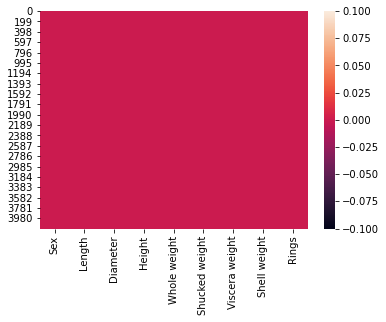

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### EDA:

In [8]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [9]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [22]:
'''Sex Ratio in Abalone'''
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


### Visualisation

<AxesSubplot:ylabel='Frequency'>

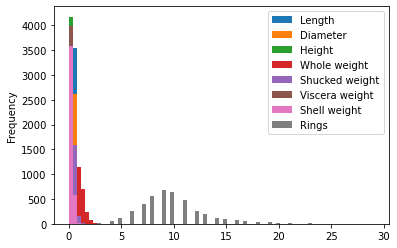

In [10]:
df.plot.hist(bins=75)

<AxesSubplot:xlabel='Rings', ylabel='count'>

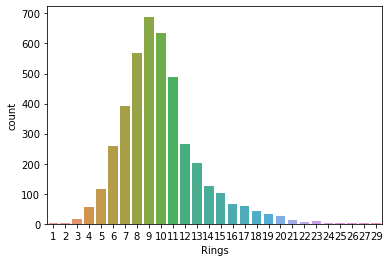

In [11]:
#count of the target variable
sns.countplot(x='Rings', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

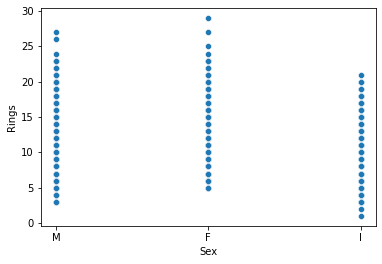

In [12]:
sns.scatterplot(x='Sex',y='Rings',data=df)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

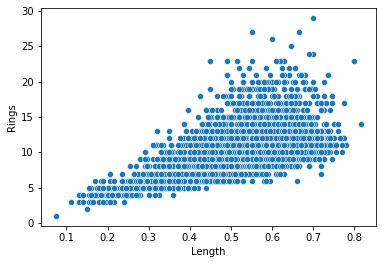

In [13]:
sns.scatterplot(x='Length',y='Rings',data=df)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

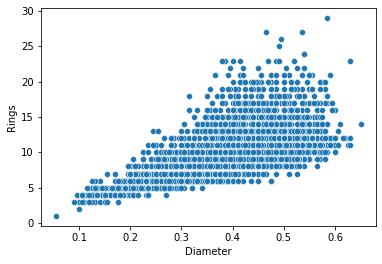

In [14]:
sns.scatterplot(x='Diameter',y='Rings',data=df)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

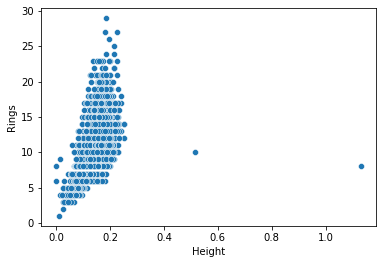

In [15]:
sns.scatterplot(x='Height',y='Rings',data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

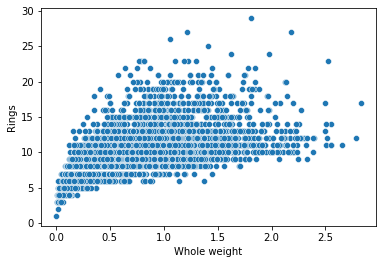

In [16]:
sns.scatterplot(x='Whole weight',y='Rings',data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

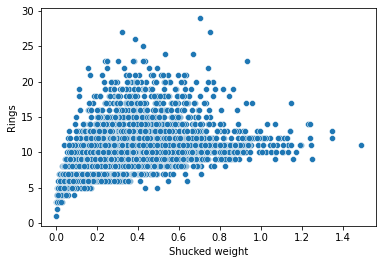

In [17]:
sns.scatterplot(x='Shucked weight',y='Rings',data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

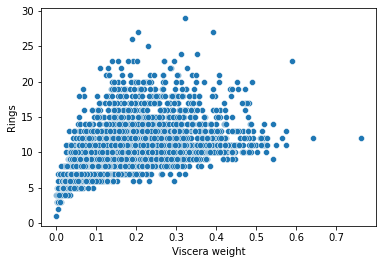

In [18]:
sns.scatterplot(x='Viscera weight', y='Rings', data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

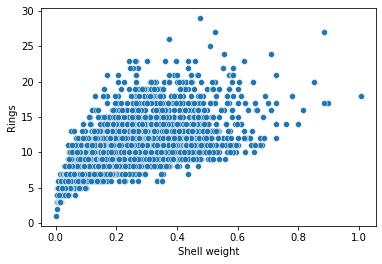

In [19]:
sns.scatterplot(x='Shell weight',y='Rings',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

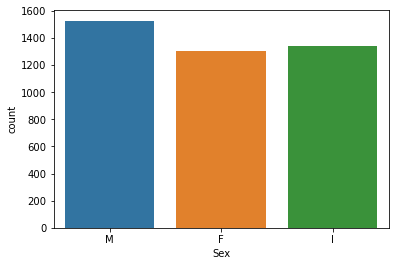

In [21]:
'''Sex Count of Abalone, M - Male, F - Female, I - Infant'''
sns.countplot(x='Sex', data = df)

### Correlation:

In [103]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


<AxesSubplot:>

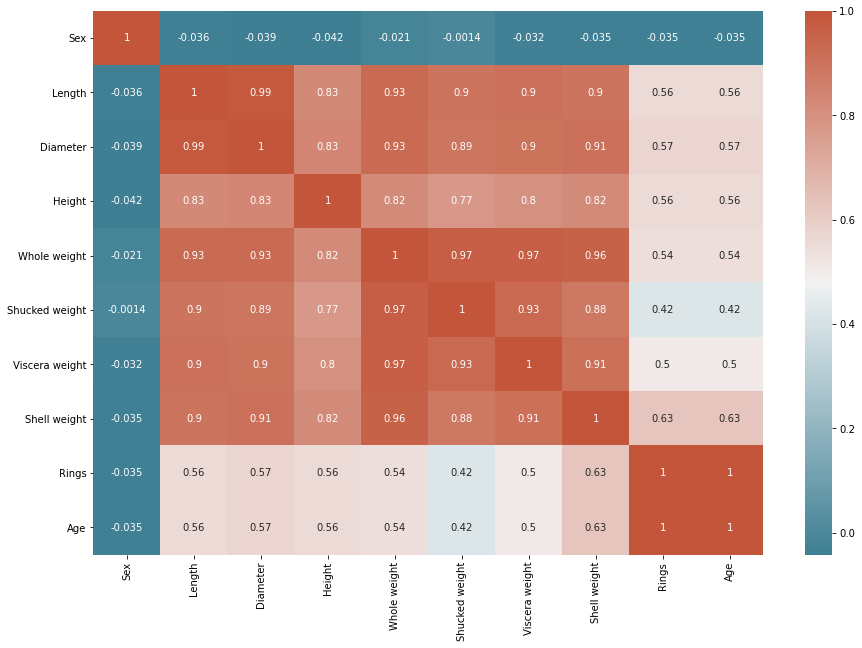

In [104]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

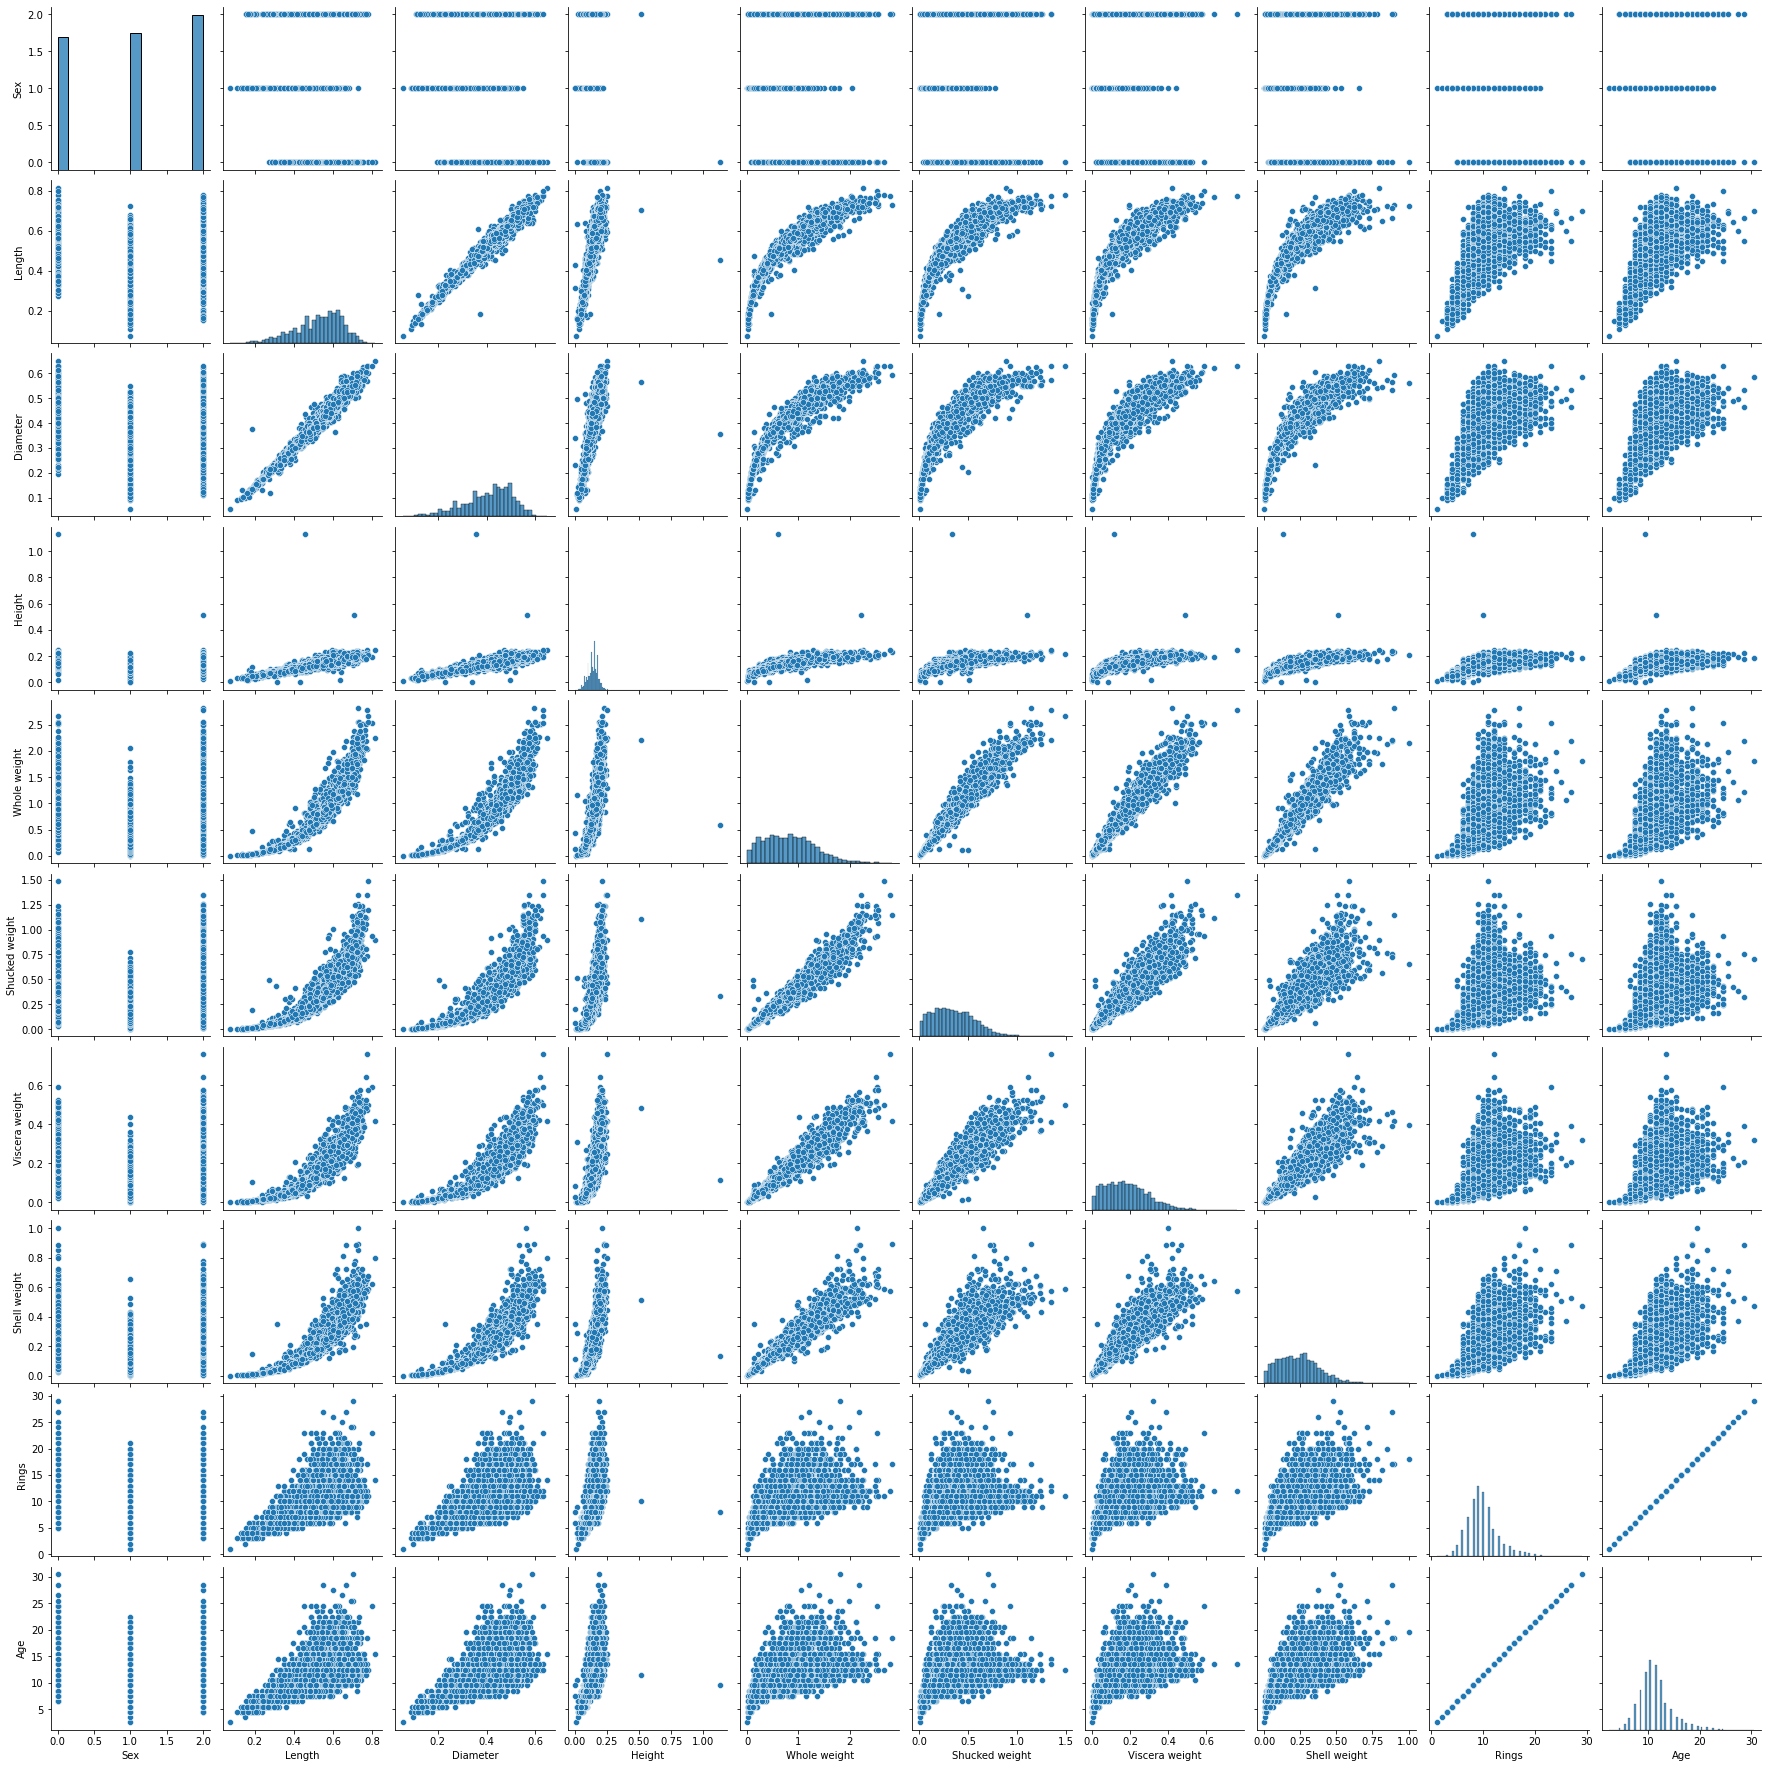

In [105]:
#Check correleation between the variables using Seaborn's pairplot. 
sns.pairplot(df)

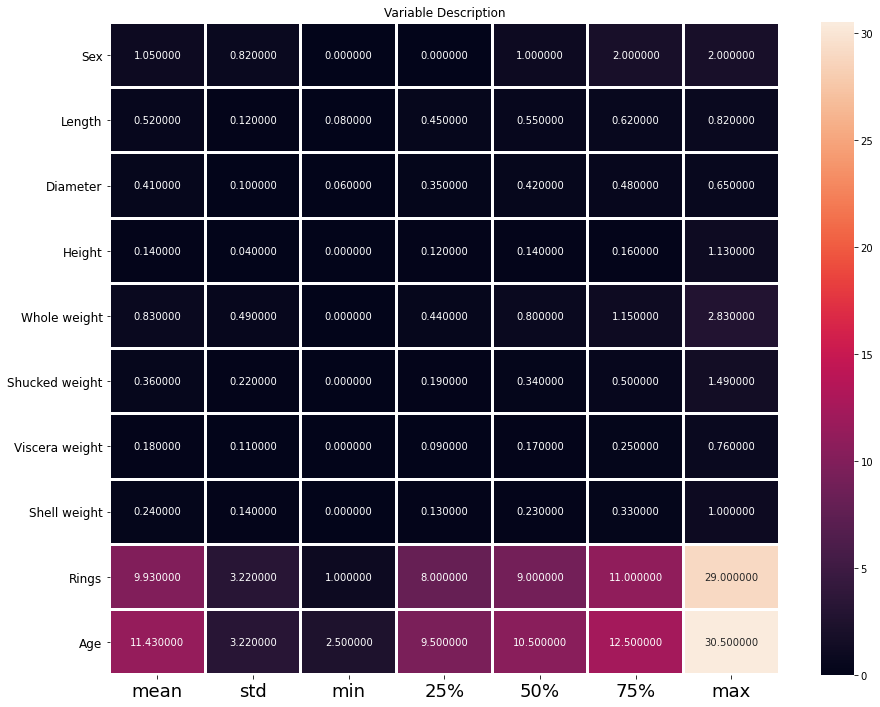

In [106]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Description")
plt.show()

### Feature Engineering:
Creating a column named "Age".

In [24]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Age'>

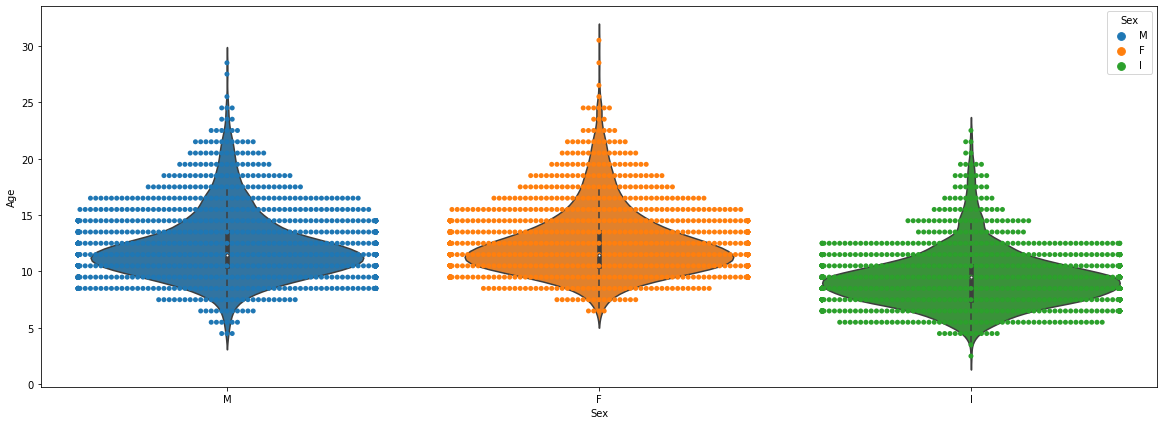

In [25]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

According to The above Graph
Male : Majority Between 7.5 to 19
Female : Majority Between 8 to 19
Infant : Majority Between 6 to < 10

### Encoding:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Age             4177 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 326.5 KB


In [30]:
from sklearn.preprocessing import LabelEncoder


In [29]:
# We are using LabelEnconding for the Categorical Data
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [42]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Normalization:

For the numerical data we will normalize the data using python libraries. We normalize as we want to bring the data in a particular range.

In [43]:
from sklearn import preprocessing
x=df.drop(['Rings'],axis=1)
y=df['Rings']
x = preprocessing.normalize(x)

We splited the data into Feature(x) and Target(y) i.e. 'Rings'

### Detecting and Removal of the Outliers:

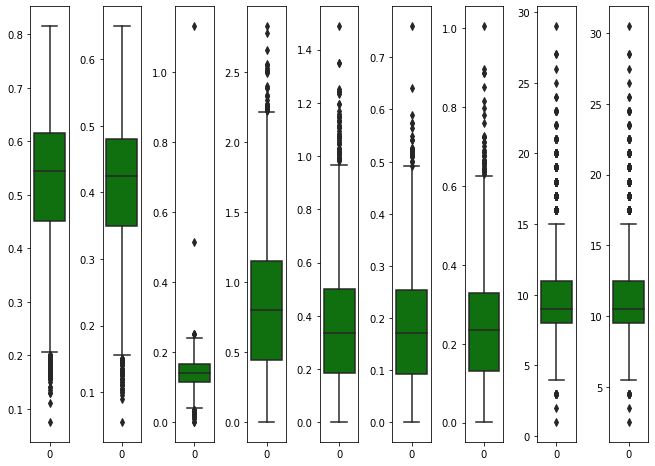

In [46]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [48]:
new_df=df[(z<3).all(axis=1)]

In [49]:
new_df.shape

(4027, 10)

In [50]:
df.shape

(4177, 10)

In [51]:
# Data Loss

Data_loss = ((4177-4027)/4027)*100
Data_loss

3.7248572138068043

The loss of data after removing the oulier is 3.72%.

### Skewness:

In [53]:
new_df.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='Density'>

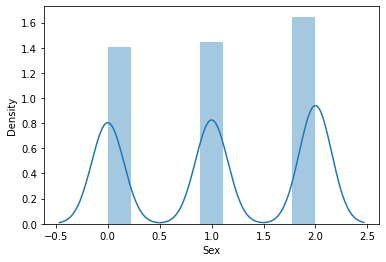

In [54]:
sns.distplot(df['Sex'])

<AxesSubplot:xlabel='Length', ylabel='Density'>

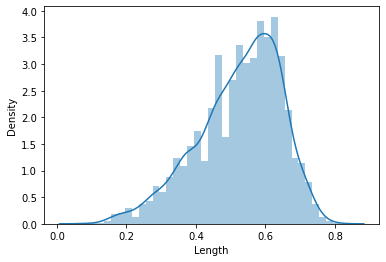

In [55]:
sns.distplot(df['Length'])

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

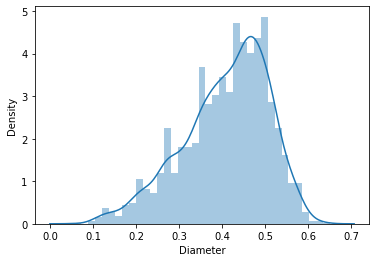

In [56]:
sns.distplot(df['Diameter'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

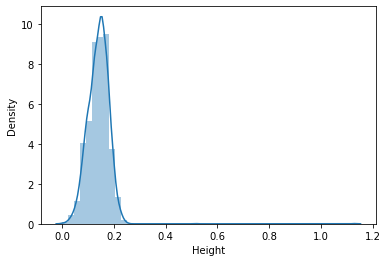

In [57]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

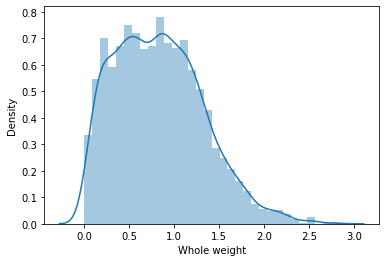

In [58]:
sns.distplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

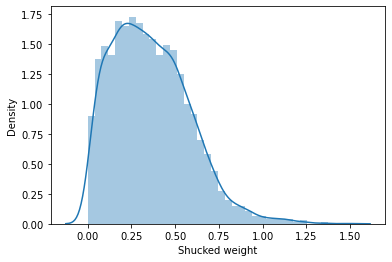

In [59]:
sns.distplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

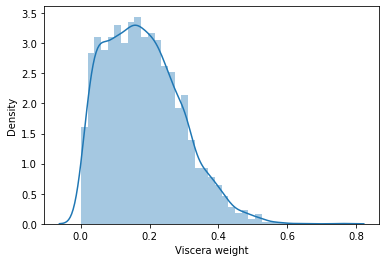

In [60]:
sns.distplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

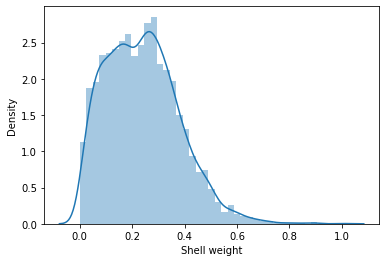

In [61]:
sns.distplot(df['Shell weight'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

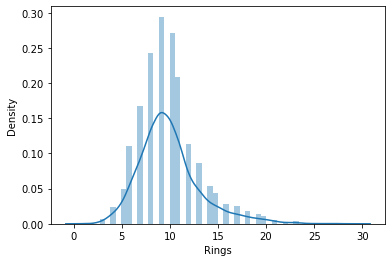

In [62]:
sns.distplot(df['Rings'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

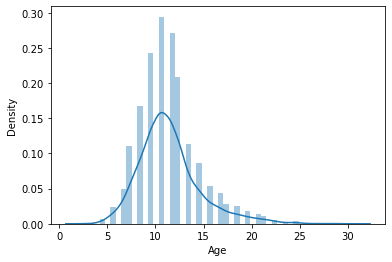

In [63]:
sns.distplot(df['Age'])

array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

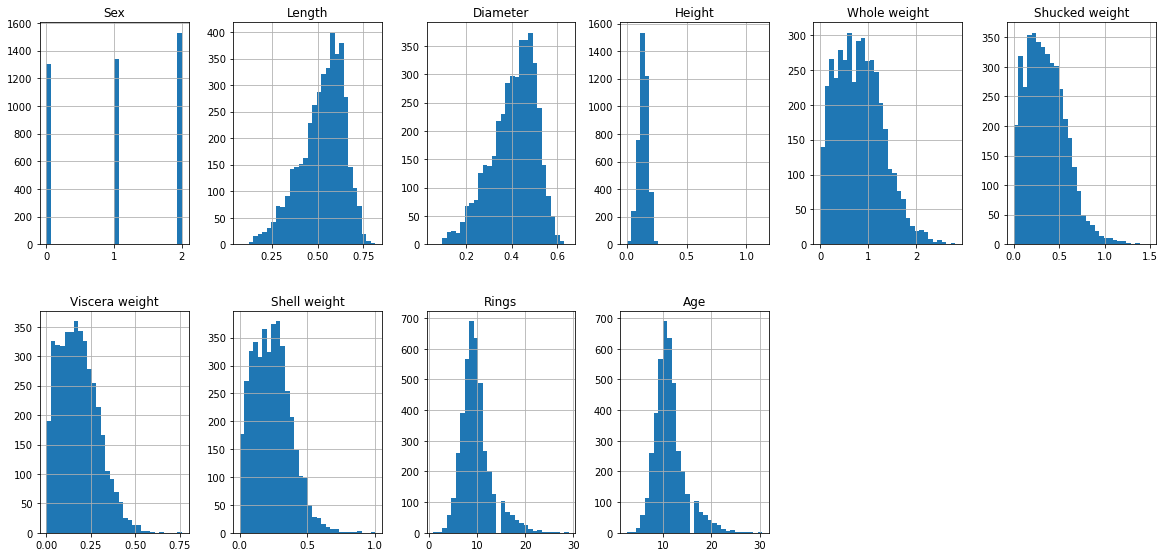

In [65]:
# Histogram : to see the numeric data distribution
df.hist(figsize=(20,20), grid = True, layout = (4,6), bins = 30)

### Scalling:

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu," on Random_state",maxRS)

Best Accuracy is 0.5127591706539075  on Random_state 75


### Train_test_split the data

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=75)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [69]:
import xgboost as xgb

In [70]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.5127591706539075


In [71]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8197767145135566


In [73]:
gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.266347687400319


In [74]:
xgb= xgb.XGBClassifier(random_state=86)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

[23:24:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8452950558213717


### Cross Validation:

In [75]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5).mean())

0.4761814170701658


In [76]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.8139864768071513


In [77]:
print(cross_val_score(gb,x,y,cv=5).mean())

0.25042918946795406


In [78]:
print(cross_val_score(xgb,x,y,cv=5).mean())

[23:26:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

### cheking for overfitting and underfitting:

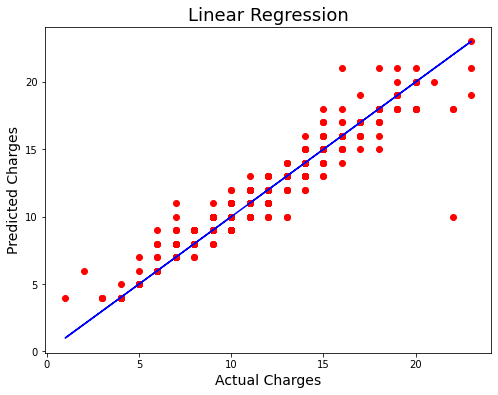

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

In [80]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameter={'random_state':list(range(0,100)),
           'max_depth':[100]}

In [98]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [99]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [100],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

In [100]:
GCV.best_params_

{'max_depth': 100, 'random_state': 90}

In [101]:
ab_final=LogisticRegression(max_iter= 100, random_state= 0)
ab_final.fit(x_train,y_train)
pred=ab_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

51.27591706539075


### Saving the model:

In [102]:
import joblib
joblib.dump(ab_final,"Abalone(submission).pkl")

['Abalone(submission).pkl']